Inter-areal balanced amplification enhances signal propagation in a large-scale circuit model of the primate cortex
======

Joglekar MR, Mejias JF, Yang GR, Wang XJ.. Neuron. 2018 Apr 4;98(1):222-234.e8. doi: 10.1016/j.neuron.2018.02.031. Epub 2018 Mar 22. PMID: 29576389.


Journal Club Tuesday 10th April 2018
------


#### Abstract
This notebook implements an interative version of the models in the Joglekar et al 2018 paper.

## Introduction
The paper discusses signal propagation from 
This notebook follows the stucture of the Joglekar et al. 2018 paper [1]:
* Firstly describing the rate model;  
* Secondly, describing the laminar model;  
* Finally, describig the spiking network model.

In [1]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")

## The Rate Model
The rate model is motivated by work in a previous wang paper [2]. The equations describe excitatory (E) and inhibitory (I) firing rates of a neuronal population:
\begin{equation}  \tau_E\frac{dv_E}{dt} =-v_e+\beta_E[I_E]_{+}, \end{equation}
\begin{equation}  \tau_I\frac{dv_I}{dt} =-v_I+\beta_I[I_I]_{+}, \end{equation}
where $[I]_+=\max(I,0)$ is the input to the system, $\tau_E$ and $\tau_I$ are time constants. $\beta_E$ and $\beta_I$ are the slopes of the f-l??? curves.

### Parameters
The parameters for the model are:

| Parameter | Excitatory (E)  | Inhibitory (I) |
|------|------|------|
|   $\tau$ (ms)| 20|10|
|   $\beta$ | 0.066|0.351|

### Model Input
The incoming current is given by 
\begin{equation}
I^i_E=(1+\eta h_i)(w_{EE} v^i_E+I_{lr,E^i})-w_{EI}v_I^i+I_{ext,E^i}
\end{equation}

\begin{equation}
I^i_I=(1+\eta h_i)(w_{IE} v^i_E+I_{lr,I^i})-w_{II}v_I^i+I_{ext,I^i}
\end{equation}
where $I^i_E$ and $I^i_I$ denote the input currents to the excitatory and inhibitory populations from area i.

$w$ denotes the local-circuit excitatory and inhibitory connections.

$h$ is the hierarchical position, it is normalised between $0$ and $1$.

$\eta$ scales the exciatory firing rate, it is set as $\eta=0.68$.

The local connectivity parameters for the input are:

| Parameter | Value  |
|------|------|
|   $\mu_{IE}$ | 25.3|
|   $w_{EE}$ | 24.3|
|   $w_{IE}$ | 12.2|
|   $w_{II}$ | 12.5|

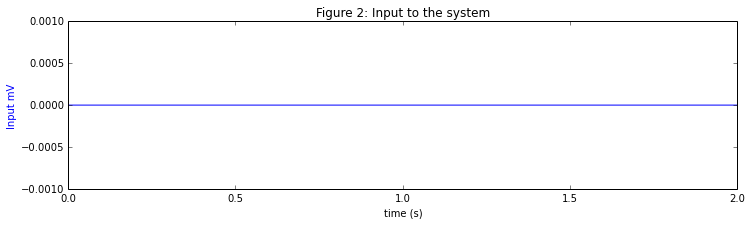

In [2]:
#### Model Parameters

mu_IE=25.3
mu_EE=33.7

def Input(input_amp,time):
    I=np.zeros((len(time)))     # CURRENT (INPUT)
    
    for k in range (0,len(time)):
        if time[k] >0.1 and time[k]<0.35:
            I[k]=input_amp # Input change
    return I


# Numerical Solution to the Izhikevich model
def DiscreteMillerRateModel(u_E,u_I,I,kI,w):
    tau_E=1000/20
    tau_I=1000/10
    w_EE=w
    w_IE=kI*w
    w_II=w
    w_EI=kI*w
    u_E = u_E + 0.0001*(-(1+w_EE)*u_E+w_EI*u_I+I)/tau_E # Discrete form of membrane potential of the neuron 
    u_I = u_I + 0.0001*(-(w_IE)*u_E+(w_II-1)*u_I+I)/tau_I            # Discrete form of membrane recovery variable
   # u_E = u_E + 0.0001*(-1*u_E+I)/tau_E # Discrete form of membrane potential of the neuron 
    #u_I = u_I + 0.0001*(-1*u_I+I)/tau_I            # Discrete form of membrane recovery variable
    return u_E,u_I

time=np.arange(0,2,0.0001)  # time period 1000ms (1s)
input_amp=0
I=Input(input_amp,time)
fig, ax1 = plt.subplots(figsize=(12,3))
ax1.plot(time, Input(input_amp,time), 'b-') # y label
ax1.set_xlabel('time (s)') # x label
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Input mV', color='b')
ax1.set_ylim(0,3*input_amp) # setting the plotting range
plt.title('Figure 2: Input to the system')
plt.show()   

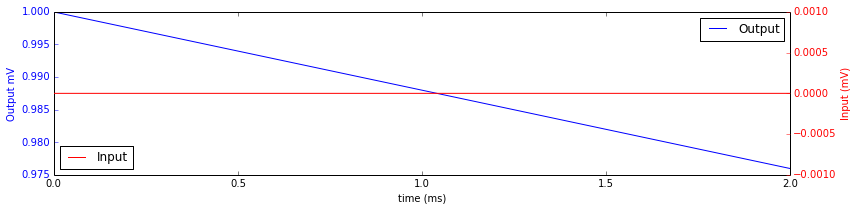

In [3]:
vE=1*np.ones(len(time))
vI=1*np.ones(len(time))

for k in range (0,len(time)-1):
   vE[k+1], vI[k+1]= DiscreteMillerRateModel(vE[k],vI[k],I[k],1.1,4)

fig, ax1 = plt.subplots(figsize=(12,3))
ax1.plot( time,vE, 'b-', label = 'Output')
ax1.set_xlabel('time (ms)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Output mV', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(time, I, 'r', label = 'Input')
ax2.set_ylim(0,input_amp*20)
ax2.set_ylabel('Input (mV)', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()
ax1.legend(loc=1)
ax2.legend(loc=3)
plt.show()

The background firing rate are 10Hz for excitatory rate and 35Hz for inhibitory, which has been subtracted for the figures.

The long-range input currents are given by 
\begin{equation}
I_{lr,E}^i=\mu_{EE}\sum_{j=1}^{N} FLN_{ij}v_{E}^j
\end{equation}
\begin{equation}
I_{lr,I}^i=\mu_{IE}\sum_{j=1}^{N} FLN_{ij}v_{E}^j
\end{equation}


To model global 

The parameters for the model are:

| Parameter | weak GBA | strong GBA |
|------|------|------|
|   $w_{EI}$ | 19.7|25.2|
|   $\mu_{EE}$ | 33.7|51.5|

In [4]:
# Numerical Solution to the Izhikevich model
def DiscreteRateModel(u_E,u_I,I_E,I_I):
    tau_E=20
    tau_I=10
    beta_E=0.066
    beta_I=0.351
    u_E = u_E + 0.0001*(-u_E+beta_E*I_E)/tau_E # Discrete form of membrane potential of the neuron 
    u_I = u_I + 0.0001*(-u_I+beta_I*I_I)/tau_I            # Discrete form of membrane recovery variable
    return u_E,u_I

In [5]:


FLN=np.random.rand(3,3)

time=np.arange(0,2,0.0001)  # time period 1000ms (1s)
vE=np.zeros((3,len(time)))
vI=np.zeros((3,len(time)))
INTERNAL= np.dot(FLN,vE[:,0])
INTERNAL= np.dot(FLN,vI[:,0])
u_E=np.zeros(3)
u_I=np.zeros(3)

I_E=np.zeros(3)
I_I=np.zeros(3)



for k in range (0,len(time)):
    for i in range(0,3):
         i+k
         u_E, v_E= DiscreteRateModel(uE,u_I,I_E,I_I)

        
        


def I_E(input_duration,input_amp,time):
    eta=0.68
    w_EE=24.3
    mu_IE=25.3
    w_IE=12.2
    I_E=(1+eta)*(w_EE+v_e+)
    I=np.zeros((len(time)))     # CURRENT (INPUT)
    
    for k in range (0,len(time)):
        if time[k] >0.1 & time[k]<0.35:
            I[k]=input_amp # Input change
    return I


SyntaxError: invalid syntax (<ipython-input-5-8bfad3dd2982>, line 32)

#### References

1 Joglekar MR, Mejias JF, Yang GR, Wang XJ. Inter-areal Balanced Amplification Enhances Signal Propagation in a Large-Scale Circuit Model of the Primate Cortex. Neuron. 2018 Apr 4;98(1):222-234.e8. doi: 10.1016/j.neuron.2018.02.031. Epub 2018 Mar 22. PMID: 29576389.
